In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [28]:
n=100

In [29]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.4758,  1.0000],
        [ 0.3523,  1.0000],
        [-0.9283,  1.0000],
        [ 0.5425,  1.0000],
        [-0.4898,  1.0000]])

In [30]:
a = tensor(3.,2); a

tensor([3., 2.])

In [32]:
y = x@a + torch.rand(n) + torch.rand(n) # + torch.rand(n)

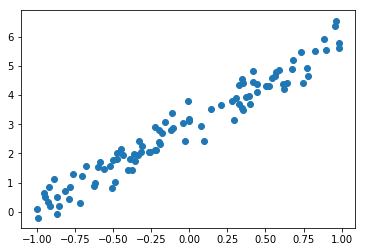

In [33]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [34]:
def mse(y_hat, y): 
    return ((y_hat-y)**2).mean()

In [99]:
def ame(y_hat, y):
    return (y_hat-y).abs().mean()

In [73]:
def e(y_hat, y):
    return (y_hat-y).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [35]:
a = tensor(-2.,4.)

In [74]:
y_hat = x@a
mse(y_hat, y)

tensor(9.4494, grad_fn=<MeanBackward1>)

In [100]:
y_hat = x@a
ame(y_hat, y)

tensor(2.6211, grad_fn=<MeanBackward1>)

In [77]:
y_hat = x@a
e(y_hat, y)

tensor(1.2648, grad_fn=<MeanBackward1>)

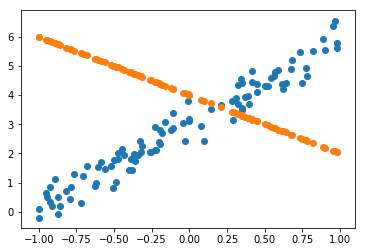

In [72]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [78]:
a = torch.tensor([-2.,4.])
a = nn.Parameter(a);
a

Parameter containing:
tensor([-2.,  4.], requires_grad=True)

In [95]:
y_hat = x@a
loss = mse(y,y_hat)
loss.backward()
with torch.no_grad():
    print(a.grad)

tensor([-39.8736,  30.3553])


In [96]:
a

Parameter containing:
tensor([-2.,  4.], requires_grad=True)

In [80]:
loss

tensor(9.4494, grad_fn=<MeanBackward1>)

In [81]:
loss.backward()

In [82]:
loss

tensor(9.4494, grad_fn=<MeanBackward1>)

In [84]:
a.grad

tensor([-3.3228,  2.5296])

In [44]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: 
        print(loss)
        plt.scatter(x[:,0],y)
        plt.scatter(x[:,0],x@a)
        plt.title(f'loss: {loss:.5f}\ngradient: {a.grad}')
        plt.figure()
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [279]:
def sgd_update(s):
    rand_idx = np.random.choice([i for i in range(n)],s,replace=False)
    y_hat = x[rand_idx]@a
    loss = mse(y[rand_idx], y_hat)
    if t % 10 == 0: 
        print(loss)
        plt.scatter(x[:,0],y)
        plt.scatter(x[:,0],x@a)
        plt.title(f'loss: {loss:.5f}\ngradient: {a.grad}')
        plt.figure()
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [234]:
def plot_pred():
    plt.scatter(x[:,0],y)
    plt.scatter(x[:,0],x@a)
    plt.title(f'''loss: {loss:.5f}
        param: {a}
        gradient: {a.grad}
        change:{lr*a.grad}
        update param:{a-(lr*a.grad)}
        ''')
    plt.figure()

In [269]:
rand_idx = np.random.choice([i for i in range(0,100)],20,replace=False)

array([94,  6, 10, 32, 91, 31, 95, 58, 71, 82, 41, 60, 28, 92, 16, 11, 68, 35, 24, 15])

stop loss: 0.0162
took 11 cycles


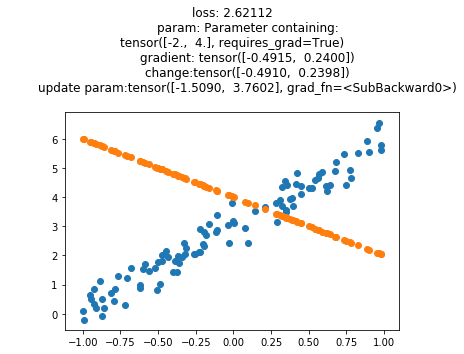

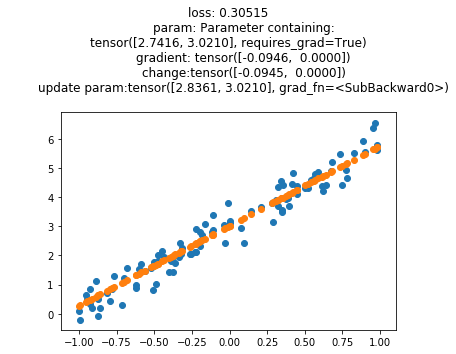

<Figure size 432x288 with 0 Axes>

In [253]:
a = nn.Parameter(torch.tensor([-2.,4.]))
lr = .999
last_loss = 0

rec = {'loss':[],
       'param_0':[],
       'param_1':[],
      }

for i in range(100):
    y_hat = x@a # get prediction error using params a
    loss = ame(y,y_hat) # calculate loss
    loss.backward() # ?, do backward pass on loss
    
    rec['loss'].append(loss.item())
    rec['param_0'].append(a[0].item())
    rec['param_1'].append(a[1].item())
    
    if i % 25 == 0:
        plot_pred()
    
    if (last_loss - loss).abs() < .02: # stop when the loss change isn't getting better
        print(f'stop loss: {last_loss-loss:.4f}')
        print(f'took {i} cycles')
        plot_pred()
        break
    else:
        last_loss = loss
    
    with torch.no_grad():
        a.sub_(lr * a.grad) # update params a
        a.grad.zero_() # ?, set a again

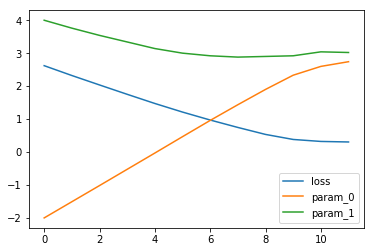

In [254]:
pd.DataFrame(rec).plot()

tensor(9.4494, grad_fn=<MeanBackward1>)
tensor(1.7083, grad_fn=<MeanBackward1>)
tensor(1.4042, grad_fn=<MeanBackward1>)
tensor(1.1590, grad_fn=<MeanBackward1>)
tensor(0.9613, grad_fn=<MeanBackward1>)
tensor(0.8019, grad_fn=<MeanBackward1>)
tensor(0.6734, grad_fn=<MeanBackward1>)
tensor(0.5697, grad_fn=<MeanBackward1>)
tensor(0.4862, grad_fn=<MeanBackward1>)
tensor(0.4188, grad_fn=<MeanBackward1>)


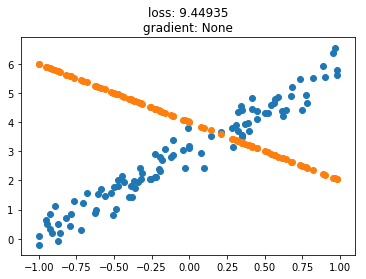

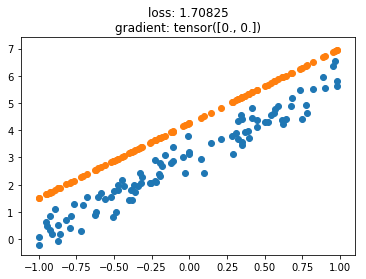

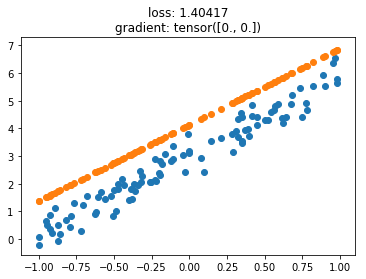

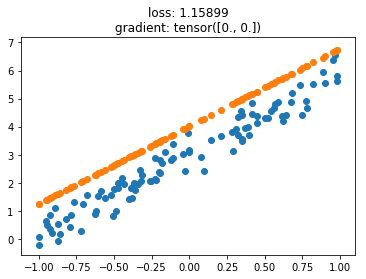

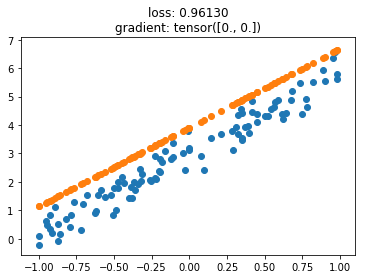

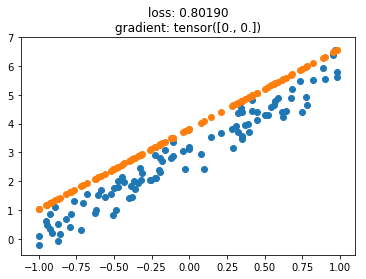

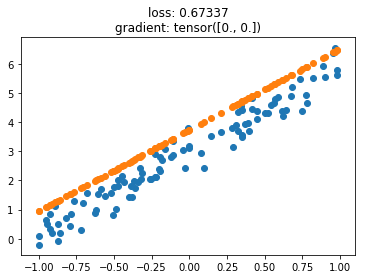

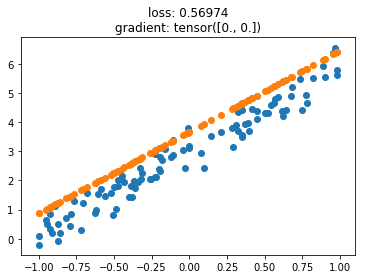

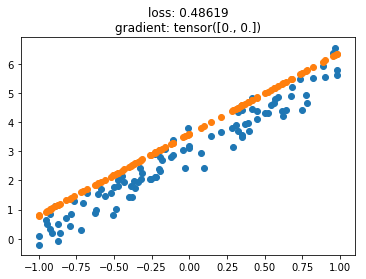

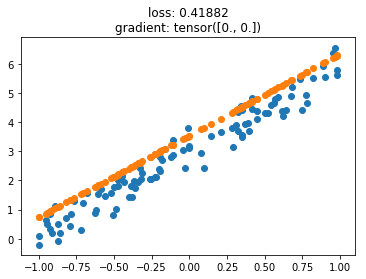

<Figure size 432x288 with 0 Axes>

In [50]:
a = nn.Parameter(torch.tensor([-2.,4.]))

lr = 1e-1
lr = 5e-1
lr = .99
for t in range(100): 
    update()

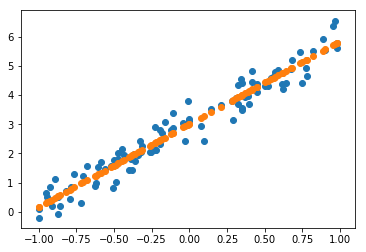

In [41]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [255]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [281]:
a = nn.Parameter(tensor(-1.,1))

# lr = .001 # slugggggggish
# lr = .01 # slow slow slow
# lr = 1e-1 # slow and steady
lr = 5e-1 # smooth
# lr = .8 # bounces but centers
# lr = .99 # bounces across prediction, but doesn't diverge
# lr = .999 # diverging

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
#     update() # very smooth because using whole dataset for error
    sgd_update(10) # bounces much more, even on small rates since random selection changes error
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.